In [1]:
import pandas as pd
indiaYT=pd.read_csv('INvideos.csv')
indiaYT.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

In [17]:
indiaYT['tagsCount']=[len(x) for x in indiaYT['tags'].str.split('|')]


In [56]:
indiaYTdata=indiaYT[['video_id','trending_date',  'channel_title', 'category_id',
         'views', 'likes', 'dislikes', 'comment_count','video_error_or_removed','tagsCount']]
indiaYTdata[:5]

,video_id,trending_date,channel_title,category_id,views,likes,dislikes,comment_count,video_error_or_removed,tagsCount
0,kzwfHumJyYc,17.14.11,Lokdhun Punjabi,1,1096327,33966,798,882,False,15
1,zUZ1z7FwLc8,17.14.11,HJ NEWS,25,590101,735,904,0,False,19
2,10L1hZ9qa58,17.14.11,TFPC,24,473988,2011,243,149,False,14
3,N1vE8iiEg64,17.14.11,Eruma Saani,23,1242680,70353,1624,2684,False,20
4,kJzGH0PVQHQ,17.14.11,Filmylooks,24,464015,492,293,66,False,11


In [38]:
indiaYTdata[['views', 'likes', 'dislikes', 'comment_count','tagsCount']].corr(method='kendall')

,views,likes,dislikes,comment_count,tagsCount
views,1.000000,0.565222,0.679446,0.500044,0.099943
likes,0.565222,1.000000,0.647437,0.725668,0.125289
dislikes,0.679446,0.647437,1.000000,0.618340,0.111700
comment_count,0.500044,0.725668,0.618340,1.000000,0.115908
tagsCount,0.099943,0.125289,0.111700,0.115908,1.000000


In [44]:
#like/dislike Ratio
#(indiaYTdata['likes']/(indiaYTdata['dislikes']+1)).sort_values(ascending=False)
#6025     769.428571
indiaYTdata.iloc[6025]['video_id']

'fFIg8WbeiUw'

In [45]:
indiaYTdata.groupby(by='video_error_or_removed').agg('mean')

,category_id,views,likes,dislikes,comment_count,tagsCount
video_error_or_removed,,,,,,
False,21.582657,1.060206e+06,27035.259206,1664.258322,2672.972872,18.761977
True,1.000000,1.983858e+06,188186.909091,4461.090909,16338.909091,1.000000


In [2]:
import matplotlib.pyplot as plt 
indiaYT['publish_time']=pd.to_datetime(indiaYT['publish_time'])

In [28]:
TimevViews=indiaYT.groupby(by='publish_time').agg({'views':'max'})[1:]

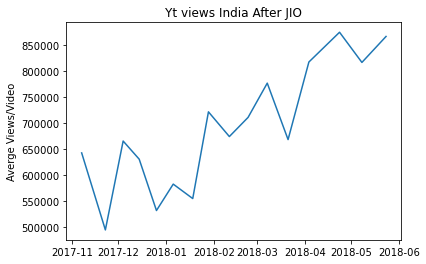

In [32]:
x=[]
y=[]
for i in range(len(TimevViews.index.values)-1005):
    if i%1000==0:
        x.append(TimevViews.index.values[i])
        y.append(sum(TimevViews.iloc[i:i+1000]['views'])//1000)

plt.plot(x,y)
plt.ylabel('Averge Views/Video')
plt.title('Yt views India After JIO')
plt.show()

In [28]:
indiaYTdata.groupby(by='channel_title').agg('count')['video_id'].sort_values(ascending=False)[:5]

channel_title
VikatanTV         284
etvteluguindia    282
Flowers Comedy    270
ETV Plus India    253
SAB TV            244
Name: video_id, dtype: int64

In [30]:
indiaYTdata.groupby(by='channel_title').agg('mean')['views'].sort_values(ascending=False)[:5]

channel_title
YouTube Spotlight              8.226435e+07
TaylorSwiftVEVO                2.864121e+07
Sony Pictures Entertainment    2.271359e+07
FoxStarHindi                   2.251442e+07
Marvel Entertainment           1.969840e+07
Name: views, dtype: float64

#Category_id
# 2 - Autos & Vehicles
# 1 -  Film & Animation
# 10 - Music
# 15 - Pets & Animals
# 17 - Sports
# 18 - Short Movies
# 19 - Travel & Events
# 20 - Gaming
# 21 - Videoblogging
# 22 - People & Blogs
# 23 - Comedy
# 24 - Entertainment
# 25 - News & Politics
# 26 - Howto & Style
# 27 - Education
# 28 - Science & Technology
# 29 - Nonprofits & Activism
# 30 - Movies
# 31 - Anime/Animation
# 32 - Action/Adventure
# 33 - Classics
# 34 - Comedy
# 35 - Documentary
# 36 - Drama
# 37 - Family
# 38 - Foreign
# 39 - Horror
# 40 - Sci-Fi/Fantasy
# 41 - Thriller
# 42 - Shorts
# 43 - Shows
# 44 - Trailers

In [32]:
indiaYTdata.groupby(by='category_id').agg('count')['video_id'].sort_values(ascending=False)[:5]
# 24 - Entertainment
# 25 - News & Politics
# 10 - Music

category_id
24    16712
25     5241
10     3858
23     3429
22     2624
Name: video_id, dtype: int64

In [35]:
indiaYTdata.groupby(by='category_id').agg('mean')['views'].sort_values(ascending=False)[:5]

category_id
20    4.162462e+06
30    3.065001e+06
10    2.631116e+06
1     2.320356e+06
17    1.887755e+06
Name: views, dtype: float64